# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
#from api_keys import api_key
api_key = "1f1aa604eb0b461fe5965d141b63fb24"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
cities

In [3]:
#base_url = "http://api.openweathermap.org/data/2.5/weather?q=London" + city + "&APPID=" + api_key



city_list = []
record_count = 1
set_count = 1

for i, city in enumerate(cities):
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    base_url = "http://api.openweathermap.org/data/2.5/weather?q=" + city + "&appid=" + api_key
    
    #print(base_url)
    url = f"{base_url}"
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    record_count += 1
    try:
        response = requests.get(url).json()
        #print("A")        
        wind_speed = response["wind"]["speed"]
        max_temp = response["main"]["temp_max"]
        lng = response["coord"]['lon']
        lat = response['coord']['lat']
        humidity = response['main']['humidity']
        date = response['dt']
        country = response['sys']['country']
        cloudiness = response['clouds']['all']
        #print("B")
        
        
        city_list.append({"Wind Speed": wind_speed,
                          "Max Temp": max_temp,
                          "Lng": lng,
                          "Lat": lat,
                          "Humidity": humidity,
                          "Date": date,
                          "Country": country,
                          "Cloudiness": cloudiness})
        #print("C")
        
        #print(city_list[i])
    except:
        print("City not found. Skipping...")
    

Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 3 of Set 1 | coquimbo
Processing Record 4 of Set 1 | avarua
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | hihifo
City not found. Skipping...
Processing Record 7 of Set 1 | north bend
Processing Record 8 of Set 1 | amderma
City not found. Skipping...
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | arrecife
City not found. Skipping...
Processing Record 12 of Set 1 | vila velha
Processing Record 13 of Set 1 | flinders
Processing Record 14 of Set 1 | madimba
Processing Record 15 of Set 1 | petropavlovsk-kamchatskiy
Processing Record 16 of Set 1 | bredasdorp
Processing Record 17 of Set 1 | tuktoyaktuk
Processing Record 18 of Set 1 | bethanien
Processing Record 19 of Set 1 | leningradskiy
Processing Record 20 of Set 1 | thompson
Processing Record 21 of Set 1 | saint-pierre
Processi

Processing Record 31 of Set 4 | jalu
Processing Record 32 of Set 4 | lagoa
Processing Record 33 of Set 4 | jiaojiang
City not found. Skipping...
Processing Record 34 of Set 4 | cuiluan
Processing Record 35 of Set 4 | merauke
Processing Record 36 of Set 4 | arlit
Processing Record 37 of Set 4 | komsomolskiy
Processing Record 38 of Set 4 | riverton
Processing Record 39 of Set 4 | barcelos
Processing Record 40 of Set 4 | rantepao
Processing Record 41 of Set 4 | san antonio
Processing Record 42 of Set 4 | ostrovnoy
Processing Record 43 of Set 4 | chicama
Processing Record 44 of Set 4 | banfora
Processing Record 45 of Set 4 | yarim
Processing Record 46 of Set 4 | flin flon
Processing Record 47 of Set 4 | hamilton
Processing Record 48 of Set 4 | matagami
Processing Record 49 of Set 4 | teya
Processing Record 0 of Set 5 | pemangkat
City not found. Skipping...
Processing Record 1 of Set 5 | asarganj
Processing Record 2 of Set 5 | paracatu
Processing Record 3 of Set 5 | baturaja
Processing Reco

Processing Record 16 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 17 of Set 8 | romny
Processing Record 18 of Set 8 | dubbo
Processing Record 19 of Set 8 | kautokeino
Processing Record 20 of Set 8 | ratnagiri
Processing Record 21 of Set 8 | plouzane
Processing Record 22 of Set 8 | afsin
Processing Record 23 of Set 8 | aksu
Processing Record 24 of Set 8 | guanica
Processing Record 25 of Set 8 | kalianget
Processing Record 26 of Set 8 | soe
Processing Record 27 of Set 8 | aykhal
Processing Record 28 of Set 8 | port moresby
Processing Record 29 of Set 8 | port alfred
Processing Record 30 of Set 8 | saint-philippe
Processing Record 31 of Set 8 | isabela
Processing Record 32 of Set 8 | pringsewu
Processing Record 33 of Set 8 | tarsus
Processing Record 34 of Set 8 | bacolod
Processing Record 35 of Set 8 | waraseoni
Processing Record 36 of Set 8 | sao filipe
Processing Record 37 of Set 8 | manturovo
Processing Record 38 of Set 8 | kushmurun
City not found. Skipping...

Processing Record 1 of Set 12 | garissa
Processing Record 2 of Set 12 | samusu
City not found. Skipping...
Processing Record 3 of Set 12 | darhan
Processing Record 4 of Set 12 | isangel
Processing Record 5 of Set 12 | aljezur
Processing Record 6 of Set 12 | mizdah
Processing Record 7 of Set 12 | umm kaddadah
Processing Record 8 of Set 12 | ararangua
Processing Record 9 of Set 12 | sangar
Processing Record 10 of Set 12 | seymchan
Processing Record 11 of Set 12 | rafai
Processing Record 12 of Set 12 | kutum
Processing Record 13 of Set 12 | san juan
Processing Record 14 of Set 12 | caluquembe
Processing Record 15 of Set 12 | houma
Processing Record 16 of Set 12 | sur
Processing Record 17 of Set 12 | pangnirtung
Processing Record 18 of Set 12 | nieuw amsterdam
Processing Record 19 of Set 12 | oistins
Processing Record 20 of Set 12 | ouango
Processing Record 21 of Set 12 | placido de castro
Processing Record 22 of Set 12 | general pico
Processing Record 23 of Set 12 | grants pass
Processing

In [ ]:
city_list

In [ ]:
response["wind"]["speed"]

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_list

[{'Wind Speed': 3.1,
  'Max Temp': 296.48,
  'Lng': -73.75,
  'Lat': 42.65,
  'Humidity': 28,
  'Date': 1555191814,
  'Country': 'US',
  'Cloudiness': 75},
 {'Wind Speed': 5.1,
  'Max Temp': 289.15,
  'Lng': -71.34,
  'Lat': -29.95,
  'Humidity': 72,
  'Date': 1555189200,
  'Country': 'CL',
  'Cloudiness': 20},
 {'Wind Speed': 4.6,
  'Max Temp': 299.15,
  'Lng': -159.78,
  'Lat': -21.21,
  'Humidity': 88,
  'Date': 1555189200,
  'Country': 'CK',
  'Cloudiness': 80},
 {'Wind Speed': 12.3,
  'Max Temp': 279.15,
  'Lng': -68.31,
  'Lat': -54.81,
  'Humidity': 75,
  'Date': 1555189200,
  'Country': 'AR',
  'Cloudiness': 40},
 {'Wind Speed': 3.6,
  'Max Temp': 284.15,
  'Lng': -124.22,
  'Lat': 43.41,
  'Humidity': 81,
  'Date': 1555191965,
  'Country': 'US',
  'Cloudiness': 90},
 {'Wind Speed': 9.41,
  'Max Temp': 297.145,
  'Lng': -134.97,
  'Lat': -23.12,
  'Humidity': 100,
  'Date': 1555191900,
  'Country': 'PF',
  'Cloudiness': 100},
 {'Wind Speed': 2.24,
  'Max Temp': 284.26,
  'Lng':

In [5]:
weather_df = pd.DataFrame(city_list)
weather_df

,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,75,US,1555191814,28,42.65,-73.75,296.480,3.10
1,20,CL,1555189200,72,-29.95,-71.34,289.150,5.10
2,80,CK,1555189200,88,-21.21,-159.78,299.150,4.60
3,40,AR,1555189200,75,-54.81,-68.31,279.150,12.30
4,90,US,1555191965,81,43.41,-124.22,284.150,3.60
5,100,PF,1555191900,100,-23.12,-134.97,297.145,9.41
6,64,NZ,1555191605,72,-46.19,168.86,284.260,2.24
7,40,BR,1555191490,83,-3.71,-38.60,300.370,3.60
8,90,AU,1555191973,82,-34.58,150.85,292.040,1.50
9,36,CM,1555192033,95,4.42,9.93,296.345,0.86


In [6]:
weather_df.count()

Cloudiness    550
Country       550
Date          550
Humidity      550
Lat           550
Lng           550
Max Temp      550
Wind Speed    550
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

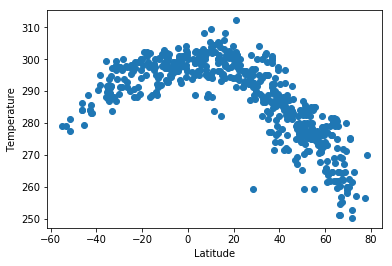

In [12]:
plt.scatter(weather_df["Lat"], weather_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Temperature")

plt.show()

#### Latitude vs. Humidity Plot

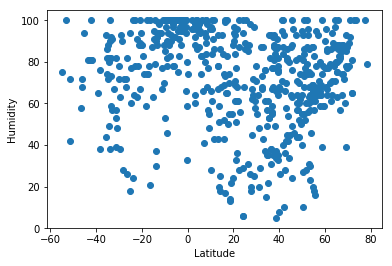

In [13]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.show()

#### Latitude vs. Cloudiness Plot

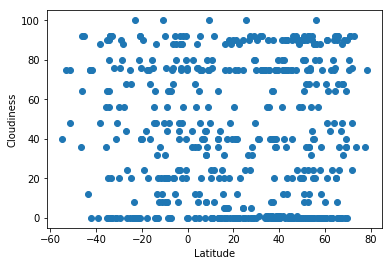

In [14]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.show()

#### Latitude vs. Wind Speed Plot

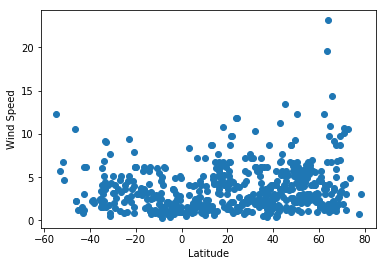

In [15]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.show()